In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavansekharnaidu","key":"35ffaa10173a5e5b6763d4a0d304d43f"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          13476        277  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          10179        213  1.0              
kapturovalexander/online-shop-2023                                  🏪🏬🛍️🛒 Online shop 2023                                3KB  2024-07-10 15:36:20            774         21  1.0              
ihelon/coffee-sales                     

In [6]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
100% 1.68G/1.68G [00:14<00:00, 197MB/s]
100% 1.68G/1.68G [00:14<00:00, 125MB/s]


In [7]:
!unzip deepfake-and-real-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Dropout,Rescaling, Resizing, Reshape
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import TopKCategoricalAccuracy, CategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers  import L2, L1

In [9]:
train_directory = '/content/Dataset/Train'
test_directory = '/content/Dataset/Test'
val_directory = '/content/Dataset/Validation'

CLASS_NAMES = 'Real','Fake'


In [10]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(299, 299),
    shuffle=True,
    seed=99
)

Found 140002 files belonging to 2 classes.


In [11]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(299, 299),
    shuffle=True,
    seed=99
)

Found 10905 files belonging to 2 classes.


In [13]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(299, 299),
    shuffle=True,
    seed=99
)

Found 39428 files belonging to 2 classes.


1
0
0
0
0
1
0
1
1
0
0
1
1
1
0
1


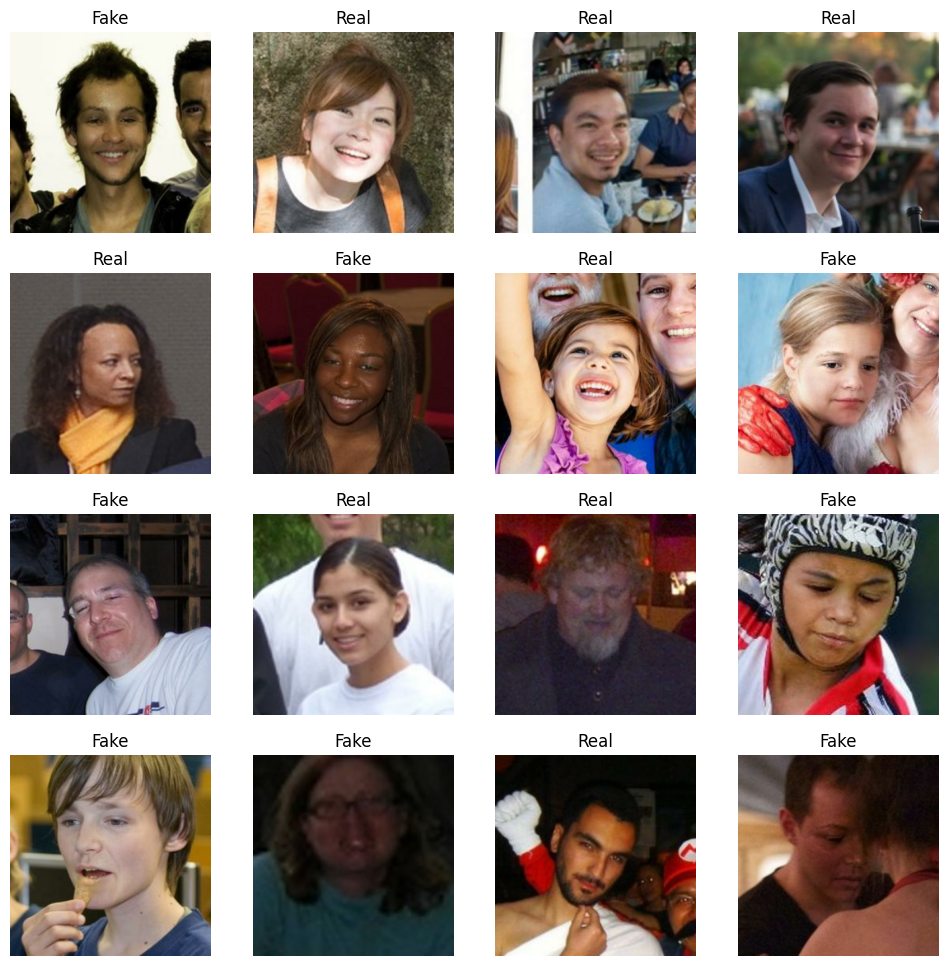

In [14]:
plt.figure (figsize=(12,12))

for images, labels in train_dataset.take(1):
  for i in range(16):
    print(labels[i].numpy().argmax())
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(CLASS_NAMES[labels[i].numpy().argmax()])
    plt.axis('off')

In [15]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam



# Create a new Sequential model
model = Sequential()

# Adding the Inceptionnet model (without the top layers)
Inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model.add(Inception_base)

# Adding a Flatten layer
model.add(Flatten())

# Adding custom layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Adding the final output layer
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
model.fit(
    train_dataset,
    epochs=2,
    validation_data=val_dataset
)

# Display the model summary
model.summary()


Epoch 1/2
4376/4376 [==============================] - 2131s 476ms/step - loss: 0.3994 - accuracy: 0.7591 - val_loss: 0.2442 - val_accuracy: 0.9001
Epoch 2/2
4376/4376 [==============================] - 2069s 473ms/step - loss: 0.0846 - accuracy: 0.9671 - val_loss: 0.1589 - val_accuracy: 0.9324
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               16777344  
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)     

In [17]:
prediction = model.predict(test_dataset)


341/341 [==============================] - 50s 139ms/step


1/1 [==============================] - 3s 3s/step


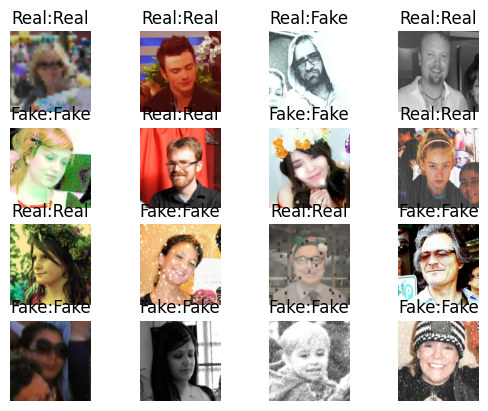

In [18]:
for image,labels in test_dataset.take(1):
    predicted = model.predict(image)

    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image[i]/255.0)
        plt.title(str(CLASS_NAMES[tf.argmax(labels[i])]) + ':'+ str(CLASS_NAMES[tf.argmax(predicted[i])]))
        plt.axis('off')


plt.show()